# Análise Exploratória de Dados – Escolaridade e Renda no Brasil

## 1. Contexto e Objetivo

Realizar uma análise exploratória dos dados da PNAD Contínua 2024 com foco em indivíduos ocupados, investigando a relação entre escolaridade, idade e renda do trabalho.

## 2. Importação e Leitura dos Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_parquet("data/PNADC_2024_v5.parquet")

In [3]:
df.head()

,Ano,Trimestre,UF,Capital,RM_RIDE,UPA,Estrato,V1008,V1014,V1022,...,VD5003,VD5004,VD5005,VD5006,VD5007,VD5008,VD5009,VD5010,VD5011,VD5012
0,2024,2,11,11,None,110000034,1110011,03,11,1,...,4,00008000,00002000,4,00008500,00002125,4,00008500,00002125,4
1,2024,2,11,11,None,110000034,1110011,03,11,1,...,4,00008000,00002000,4,00008500,00002125,4,00008500,00002125,4
2,2024,2,11,11,None,110000034,1110011,03,11,1,...,4,00008000,00002000,4,00008500,00002125,4,00008500,00002125,4
3,2024,2,11,11,None,110000034,1110011,03,11,1,...,4,00008000,00002000,4,00008500,00002125,4,00008500,00002125,4
4,2024,2,11,11,None,110000034,1110011,06,11,1,...,6,00010000,00005000,6,00010000,00005000,6,00010000,00005000,6


## 3. Limpeza e Preparação dos Dados

In [4]:
df.shape

(381581, 81)

O dataset possui 381581 linhas e 81 colunas.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381581 entries, 0 to 381580
Data columns (total 81 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Ano        381581 non-null  object
 1   Trimestre  381581 non-null  object
 2   UF         381581 non-null  object
 3   Capital    90473 non-null   object
 4   RM_RIDE    120439 non-null  object
 5   UPA        381581 non-null  object
 6   Estrato    381581 non-null  object
 7   V1008      381581 non-null  object
 8   V1014      381581 non-null  object
 9   V1022      381581 non-null  object
 10  V1023      381581 non-null  object
 11  V1030      381581 non-null  object
 12  V1031      381581 non-null  object
 13  V1032      381581 non-null  object
 14  V1034      381581 non-null  object
 15  V2001      381581 non-null  object
 16  V2003      381581 non-null  object
 17  V2005      381581 non-null  object
 18  V2007      381581 non-null  object
 19  V2008      381581 non-null  object
 20  V200

In [6]:
df.columns

Index(['Ano', 'Trimestre', 'UF', 'Capital', 'RM_RIDE', 'UPA', 'Estrato',
       'V1008', 'V1014', 'V1022', 'V1023', 'V1030', 'V1031', 'V1032', 'V1034',
       'V2001', 'V2003', 'V2005', 'V2007', 'V2008', 'V20081', 'V20082',
       'V2009', 'V2010', 'V3001', 'V3002', 'V4009', 'V4010', 'V4012', 'V40121',
       'V4013', 'V4019', 'V4029', 'VD2002', 'VD2003', 'VD2004', 'VD2006',
       'VD3004', 'VD3005', 'VD3006', 'VD4001', 'VD4002', 'VD4003', 'VD4004A',
       'VD4005', 'VD4007', 'VD4008', 'VD4009', 'VD4010', 'VD4011', 'VD4012',
       'VD4013', 'VD4014', 'VD4015', 'VD4016', 'VD4017', 'VD4018', 'VD4019',
       'VD4020', 'VD4022', 'VD4030', 'VD4031', 'VD4035', 'VD4036', 'VD4037',
       'VD4046', 'VD4047', 'VD4048', 'VD4052', 'VD5001', 'VD5002', 'VD5003',
       'VD5004', 'VD5005', 'VD5006', 'VD5007', 'VD5008', 'VD5009', 'VD5010',
       'VD5011', 'VD5012'],
      dtype='object')

In [7]:
colunas = [
    'V2009',   # idade
    'V2007',   # sexo
    'VD3004',  # escolaridade
    'VD3005',  # anos de estudo
    'VD4019',  # renda
    'UF',      # região
    'VD4002'   # situação de trabalho
]

df = df[colunas]

In [8]:
df = df.rename(columns={
    'V2009': 'idade',
    'V2007': 'sexo',
    'VD3004': 'escolaridade',
    'VD3005': 'anos_estudo',
    'VD4019': 'renda_mensal',
    'UF': 'regiao',
    'VD4002': 'situacao_trabalho'
})


In [9]:
df.head()

,idade,sexo,escolaridade,anos_estudo,renda_mensal,regiao,situacao_trabalho
0,043,1,7,16,00005000,11,1
1,039,2,7,16,00003500,11,1
2,008,2,2,02,None,11,None
3,001,1,None,None,None,11,None
4,049,2,7,16,00010000,11,1


In [10]:
df.isnull().sum()

idade                     0
sexo                      0
escolaridade          20933
anos_estudo           20933
renda_mensal         218832
regiao                    0
situacao_trabalho    202838
dtype: int64

Foi realizada uma verificação de valores ausentes para avaliar a qualidade dos dados antes da análise.

In [11]:
df['renda_mensal'].describe()

count       162749
unique        2287
top       00001412
freq         20978
Name: renda_mensal, dtype: object

In [12]:
df['renda_mensal'] = pd.to_numeric(
    df['renda_mensal'],
    errors='coerce'
)

A variável renda mensal foi convertida para o formato numérico, tratando valores inválidos como ausentes.

In [13]:
df['renda_mensal'].describe()

count    162749.000000
mean       2946.059693
std        4432.383993
min          10.000000
25%        1412.000000
50%        1800.000000
75%        3000.000000
max      300000.000000
Name: renda_mensal, dtype: float64

In [14]:
df['renda_mensal'].isnull().sum()

np.int64(218832)

In [15]:
df = df[df['renda_mensal']>0]

Foram removidos registros com renda mensal inválida ou igual a zero.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162749 entries, 0 to 381579
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   idade              162749 non-null  object 
 1   sexo               162749 non-null  object 
 2   escolaridade       162749 non-null  object 
 3   anos_estudo        162749 non-null  object 
 4   renda_mensal       162749 non-null  float64
 5   regiao             162749 non-null  object 
 6   situacao_trabalho  162749 non-null  object 
dtypes: float64(1), object(6)
memory usage: 9.9+ MB


In [17]:
df['idade'] = pd.to_numeric(
    df['idade'],
    errors='coerce'
)

A variável idade foi convertida para o formato numérico, tratando valores inválidos como ausentes.

In [18]:
df['idade'].isnull().sum()

np.int64(0)

In [19]:
df[(df['idade'] >= 14) & (df['idade'] <= 100)]

,idade,sexo,escolaridade,anos_estudo,renda_mensal,regiao,situacao_trabalho
0,43,1,7,16,5000.0,11,1
1,39,2,7,16,3500.0,11,1
4,49,2,7,16,10000.0,11,1
7,61,1,7,16,11000.0,11,1
9,57,1,4,12,1300.0,11,1
...,...,...,...,...,...,...,...
381572,31,1,7,16,4000.0,53,1
381576,39,1,7,16,9000.0,53,1
381577,31,2,7,16,3000.0,53,1
381578,52,1,7,14,5000.0,53,1


Foram mantidos apenas registros com idades entre 14 e 100 anos.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162749 entries, 0 to 381579
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   idade              162749 non-null  int64  
 1   sexo               162749 non-null  object 
 2   escolaridade       162749 non-null  object 
 3   anos_estudo        162749 non-null  object 
 4   renda_mensal       162749 non-null  float64
 5   regiao             162749 non-null  object 
 6   situacao_trabalho  162749 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 9.9+ MB


In [21]:
df['sexo'].value_counts()

sexo
1    93514
2    69235
Name: count, dtype: int64

In [22]:
df['escolaridade'].value_counts()

escolaridade
5    56209
7    35880
2    34599
3    11537
4    10705
6     9448
1     4371
Name: count, dtype: int64

In [23]:
df['situacao_trabalho'].value_counts()

situacao_trabalho
1    162749
Name: count, dtype: int64

In [24]:
df['sexo'] = pd.to_numeric(
    df['sexo'],
    errors='coerce'
)

In [25]:
df['sexo'].unique()

array([1, 2])

In [26]:
df['sexo'] = df['sexo'].map({
    1: 'Masculino',
    2: 'Feminino'
})

In [27]:
df['sexo'].value_counts()

sexo
Masculino    93514
Feminino     69235
Name: count, dtype: int64

A variável sexo foi convertida para formato numérico antes da recodificação, garantindo a correta tradução dos códigos para categorias textuais. 

In [28]:
df['escolaridade'] = pd.to_numeric(
    df['escolaridade'],
    errors='coerce'
)

In [29]:
df['escolaridade'].unique()

array([7, 4, 5, 3, 2, 6, 1])

In [30]:
df['escolaridade'] = df['escolaridade'].map({
    1: 'Sem instrução',
    2: 'Fundamental incompleto',
    3: 'Fundamental completo',
    4: 'Médio incompleto',
    5: 'Médio completo',
    6: 'Superior incompleto',
    7: 'Superior completo'
})


In [31]:
df['escolaridade'].unique()

array(['Superior completo', 'Médio incompleto', 'Médio completo',
       'Fundamental completo', 'Fundamental incompleto',
       'Superior incompleto', 'Sem instrução'], dtype=object)

A variável escolaridade também foi convertida para formato numérico antes da recodificação, garantindo a correta tradução dos códigos para categorias textuais.

In [32]:
df['situacao_trabalho'].unique()

array(['1'], dtype=object)

In [33]:
df['situacao_trabalho'] = pd.to_numeric(
    df['situacao_trabalho'],
    errors='coerce'
)

In [34]:
df['situacao_trabalho'] = df['situacao_trabalho'].map({
    1: 'Ocupado',
    2: 'Desocupado',
    3: 'Fora da força de trabalho'
})

In [35]:
df['situacao_trabalho'].unique()

array(['Ocupado'], dtype=object)

A variável situação trabalho também foi convertida para formato numérico antes da recodificação, garantindo a correta tradução dos códigos para categorias textuais.

In [36]:
df = df.dropna()

Após a recodificação das variáveis categóricas, registros inconsistentes foram removidos.

## 4. Análise Exploratória dos Dados (EDA)

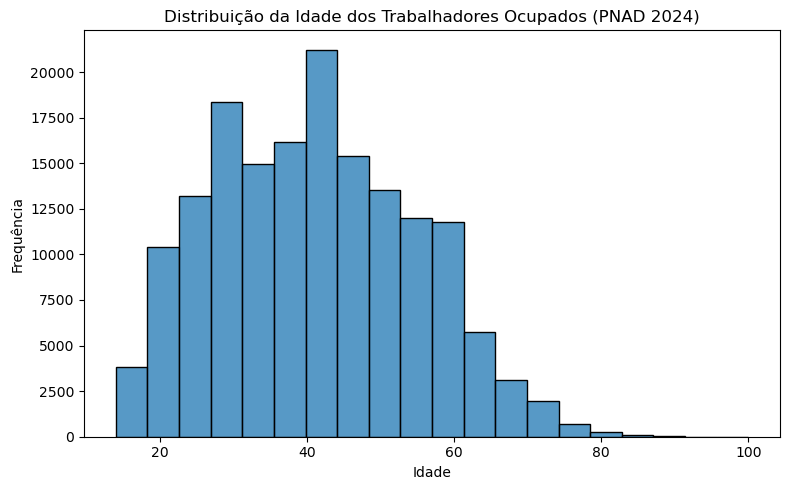

In [37]:
plt.figure(figsize=(8,5))
sns.histplot(df['idade'], bins=20)
plt.title('Distribuição da Idade dos Trabalhadores Ocupados (PNAD 2024)')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

A distribuição etária concentra-se majoritariamente na população adulta.

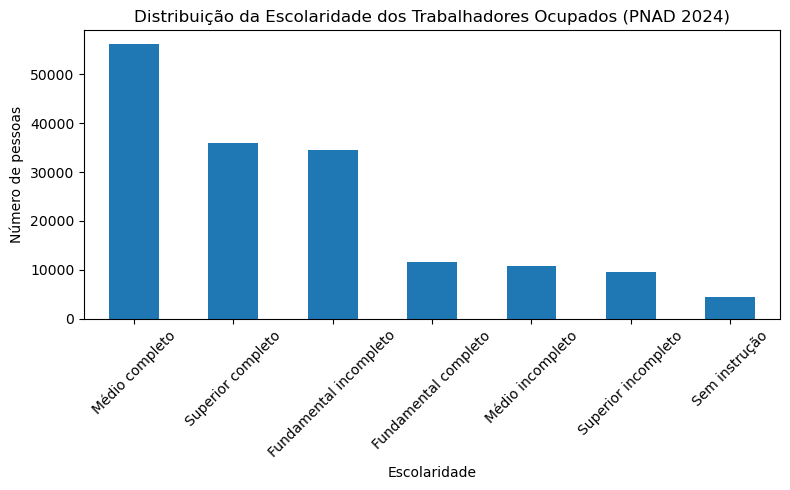

In [38]:
plt.figure(figsize=(8,5))
df['escolaridade'].value_counts().plot(kind='bar')
plt.title('Distribuição da Escolaridade dos Trabalhadores Ocupados (PNAD 2024)')
plt.xlabel('Escolaridade')
plt.ylabel('Número de pessoas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observa-se maior concentração da população nos níveis de ensino médio completo, seguido dos níveis de ensino superior completo e ensino fundamental incompleto.

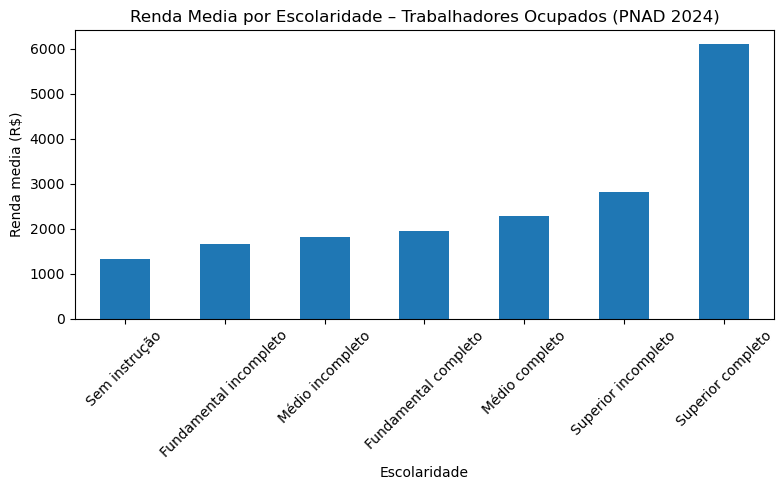

In [39]:
renda_media = (
    df.groupby('escolaridade')['renda_mensal']
    .mean()
    .sort_values()
)

plt.figure(figsize=(8,5))
renda_media.plot(kind='bar')
plt.title('Renda Media por Escolaridade – Trabalhadores Ocupados (PNAD 2024)')
plt.xlabel('Escolaridade')
plt.ylabel('Renda media (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A renda mensal tende a aumentar conforme o nível de escolaridade.

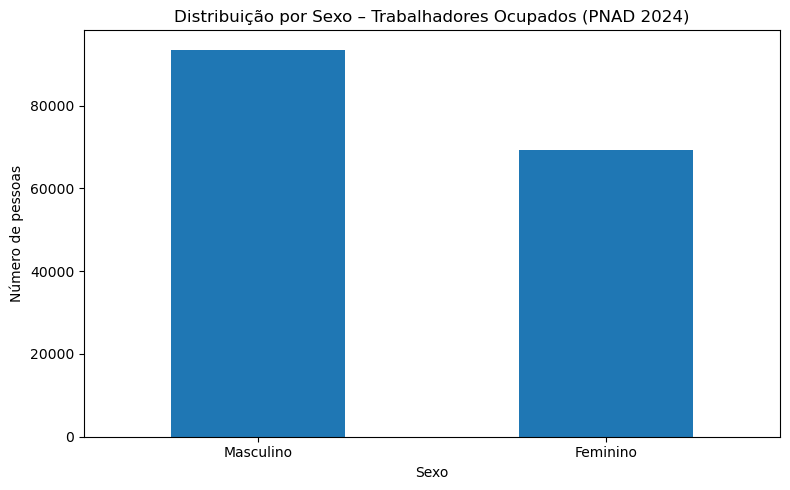

In [40]:
plt.figure(figsize=(8,5))
df['sexo'].value_counts().plot(kind='bar')
plt.title('Distribuição por Sexo – Trabalhadores Ocupados (PNAD 2024)')
plt.xlabel('Sexo')
plt.ylabel('Número de pessoas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Mesmo considerando diferentes perfis, observa-se diferença de renda entre os gêneros.

## 5. Insights Numéricos

In [41]:
df.groupby('escolaridade')['renda_mensal'].mean().sort_values()

escolaridade
Sem instrução             1326.601693
Fundamental incompleto    1661.468626
Médio incompleto          1803.820364
Fundamental completo      1950.074283
Médio completo            2290.095376
Superior incompleto       2818.805356
Superior completo         6104.252843
Name: renda_mensal, dtype: float64

A renda média cresce significativamente entre os níveis mais baixos e mais altos de escolaridade.

In [42]:
df.groupby('sexo')['renda_mensal'].mean()

sexo
Feminino     2652.815007
Masculino    3163.169386
Name: renda_mensal, dtype: float64

A renda média apresenta diferença entre os gêneros, indicando desigualdade salarial.

### Limitações

Embora a análise considere indivíduos com idade entre 14 e 100 anos, observa-se que todos os registros da base analisada estão classificados como ocupados. Isso ocorre porque a variável VD4002, conforme o dicionário de dados da PNAD Contínua, é aplicada apenas a indivíduos que já declararam algum tipo de vínculo de trabalho nas etapas anteriores do questionário. Dessa forma, pessoas fora da força de trabalho — como aposentados, estudantes, donas de casa ou indivíduos que não exerceram atividade econômica na semana de referência — não estão representadas nesta base. Além disso, o conceito de ocupação adotado pela PNAD é amplo, incluindo trabalhos informais, eventuais ou realizados por poucas horas, o que explica a presença de indivíduos em faixas etárias mais elevadas classificados como ocupados.

### Conclusões

* A escolaridade apresenta forte relação com a renda mensal
* Diferenças de renda entre gêneros permanecem evidentes
* Os dados reforçam o papel da educação como fator socioeconômico relevante
* A base analisada contempla exclusivamente indivíduos ocupados
* Observa-se relação positiva entre escolaridade e renda média
* A análise evidencia limitações da base, mas demonstra o potencial de uso dos dados da PNAD para estudos socioeconômicos